# IPBMA_5: Projection Radiography

**Authors**: 
- Pablo García Fernández (pablo.garcia.fernandez2@rai.usc.es)
- Javier Goya Pérez (javier.goya@rai.usc.es)
- Sindy Rocío Mojica Gómez (sindyrocio.mojica@rai.usc.es)

In [369]:
# Configuration
import numpy as np
import matplotlib.pyplot as plt
%run ./funciones.py
%run ./funciones_phantoms.py

SOURCE

In [370]:
# source(kVp, N0)
# return number of photoms (N0), efective energy (eE)

kVp= 30
I0= 250  
N0, eE= source(kVp, I0)

print(N0, eE)


250 12.0


CUBE PHANTOM

In [371]:
# OBJECT
# phantom(size, eE)
# return phantomData

size= 256
obj= cube_phantom(size, eE)

coef_air: 0.0044797199999999995
coef_water: 3.8666
coef_soft: 4.14142


QUANTUM IMAGE. FRONTAL VIEW.

In [372]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'frontal'
qImage= interactor_PR(N0, obj, prj)

KeyboardInterrupt: 

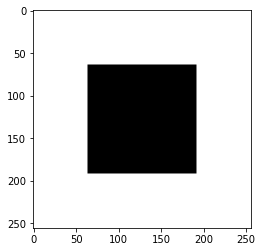

In [ ]:
plt.imshow(qImage, cmap="gray")
plt.show()


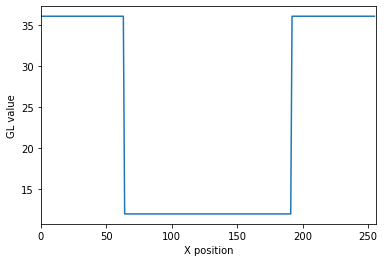

In [ ]:
line = plotLineH(qImage, 128)

In [ ]:
# Get number of photoms

nSI= int(N0*size*size)
print(f'Number of Photons (From the source): {nSI:d}')

nQI= int(getNumberPhotons(qImage))
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 1969957


In [ ]:
# Get Distribution of the Photons per Cell

nPC= getNumberPhotonsCell(qImage, N0)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 1946157


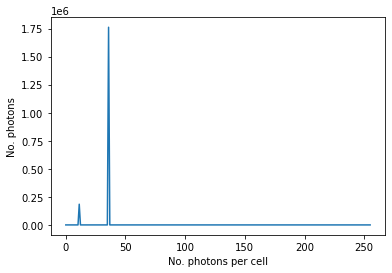

In [ ]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [ ]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


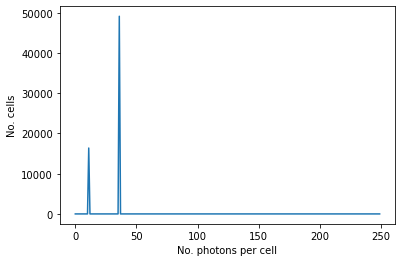

In [ ]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

QUANTUM IMAGE. LATERAL VIEW

In [ ]:
# Interaction
# return qImage -> Quantum Image, ideal conditions

prj= 'lateral'
qImage= interactor_PR(N0, obj, prj)

KeyboardInterrupt: 

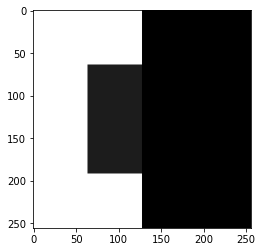

In [ ]:
plt.imshow(qImage.T, cmap="gray")
plt.show()

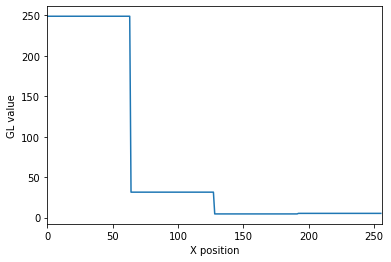

In [ ]:
line = plotLineH(qImage, 128)

In [ ]:
# Get Number of Photoms

nSI= N0*size*size
print(f'Number of Photons (From the source): {nSI:d}')

nQI= int(getNumberPhotons(qImage))
print(f'Number of Photons (Quantum image): {nQI:d}')

assert nSI > nQI, "Something wrong happens"

Number of Photons (From the source): 16384000
Number of Photons (Quantum image): 6540156


In [ ]:
# Get Distribution of the Photons per Cell
nPC= getNumberPhotonsCell(qImage, N0)
print(f'Number of Photons (Quantum image): {int(sum(nPC[1])):d}')

Number of Photons (Quantum image): 6526337


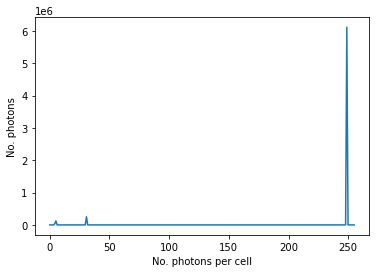

In [ ]:
plotDistribution(nPC, 'No. photons per cell', 'No. photons')

In [ ]:
# Get Distribution of cells per Photons

nCP= getNumberCellsPhoton(qImage, N0)
print(f'Number of Cells (Quantum image): {int(sum(nCP[1])):d}')

Number of Cells (Quantum image): 65536


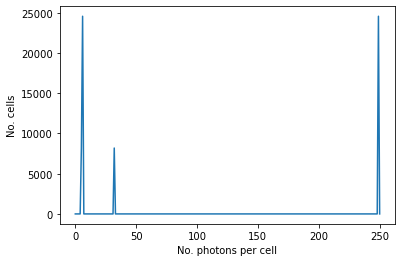

In [ ]:
plotDistribution(nCP, 'No. photons per cell', 'No. cells')

DETECTED IMAGE

In [ ]:
# Detection
# dImage -> The detected image, under the hypothesis of Poisson distribution.
dImage= detectorNoiseP(qImage, size, size)
print(np.max(dImage))


N Cells: 256 256
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [1 0 1 ... 0 1 2]
 [0 0 0 ... 0 0 0]]
5


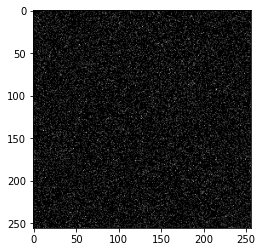

In [ ]:
plt.imshow(dImage.T, cmap="gray")
plt.show()